In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import skimage 
import fitz

In [8]:
img = np.load('../DeepOpenLungData/OUTPUTS/prep/dcm_example_clean.npy')

In [9]:
img.shape

(1, 252, 234, 336)

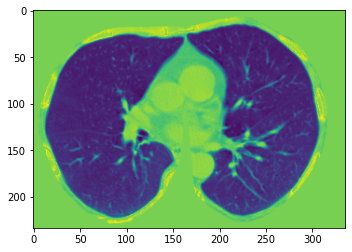

In [18]:
plt.imshow(img[0][int(img.shape[1] / 2)])
skimage.io.imsave('./test_img.png', img[0][int(img.shape[1] / 2)])

In [10]:
from PyPDF2 import PdfFileWriter
pdf_writer = PdfFileWriter()
pdf_writer.addBlankPage(width=220, height=300)
from pathlib import Path
with Path("blank.pdf").open(mode="wb") as output_file:
    pdf_writer.write(output_file)
    

In [18]:
#https://github.com/pymupdf/PyMuPDF/wiki/How-to-Insert-new-PDF-Pages,-Images-and-Text
input_file = "blank.pdf"
output_file = "blank_img.pdf"
barcode_file = "test_img.png"

image_rectangle = fitz.Rect(0,0,200,200)

# retrieve the first page of the PDF
file_handle = fitz.open(input_file)
first_page = file_handle[0]
pix = fitz.Pixmap(barcode_file) 
# add the image
first_page.insertImage(image_rectangle, pixmap=pix)

file_handle.save(output_file)

In [20]:
text = "predicted cancer proability: 0.01, non_cancer"
fname = "F0"

where = fitz.Point(10, 220)    # text starts here
# this inserts 2 lines of text using font `DejaVu Sans Mono`
first_page.insertText(where, text,
#                 fontname=fname,    # arbitrary if fontfile given
#                 fontfile=ffile,    # any file containing a font
                fontsize=10,       # default
                rotate=0,          # rotate text
                color=(0, 0, 1),   # some color (blue)
                overlay=True)      # text in foreground
file_handle.save(output_file)

In [ ]:
python3 ./5_create_pdf.py --save_csv_path ../DeepOpenLungData/OUTPUTS/Metrics/CSV/pred.csv --save_txt_path ../DeepOpenLungData/OUTPUTS/Classification/cls.txt --save_prep_path ../DeepOpenLungData/OUTPUTS/temp/prep --save_pdf_path ../DeepOpenLungData/OUTPUTS/PDF

